<a href="https://colab.research.google.com/github/Femifunmi/Python/blob/main/Movies_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a dataset on movies. I will be using this to analyze:

- The movies that have the highest votes
- The most common category
- The year that has the highest number of release
- Visualize the category that has the highest gross total

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I will like to import the csv file i downloaded from kaggle

In [ ]:
df=pd.read_csv('movies.csv')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [ ]:
df['year_of_release']= df['year_of_release'].str.replace('(','').str.replace(')','')

<ipython-input-4-9f6c65fbdd8f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['year_of_release']= df['year_of_release'].str.replace('(','').str.replace(')','')


The data has been cleaned to some extent, so it is just to analyze and visualize it


In [ ]:
df.groupby(by='category')['index'].count()

category
Approved     4
G            6
GP           1
PG          11
PG-13       16
Passed       3
R           58
Name: index, dtype: int64

In [ ]:
df=df.sort_values(by= 'year_of_release', ascending= True)
df

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
97,98.0,City Lights,1931,G,87 min,"Comedy, Drama, Romance",8.5,"186,059",$0.02M
51,52.0,Modern Times,1936,G,87 min,"Comedy, Drama, Romance",8.5,"244,162",$0.16M
26,27.0,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War",8.2,"317,621",$198.68M
35,36.0,Citizen Kane,1941,PG,119 min,"Drama, Mystery",8.3,"444,359",$1.59M
5,6.0,Casablanca,1942,PG,102 min,"Drama, Romance, War",8.5,"574,092",$1.02M
...,...,...,...,...,...,...,...,...,...
80,81.0,The Hobbit: The Desolation of Smaug,2013,PG-13,161 min,"Adventure, Fantasy",7.8,"667,864",$258.37M
82,83.0,12 Years a Slave,2013,R,134 min,"Biography, Drama, History",8.1,"703,824",$56.67M
71,72.0,Interstellar,2014,PG-13,169 min,"Adventure, Drama, Sci-Fi",8.6,"1,835,790",$188.02M
79,80.0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138 min,"Action, Adventure, Sci-Fi",7.8,"933,771",$936.66M


In [ ]:
df['gross_total']= df['gross_total'].str.replace('$','').str.replace('M','').astype(float)



<ipython-input-7-ed9938912cef>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['gross_total']= df['gross_total'].str.replace('$','').str.replace('M','').astype(float)


In [ ]:
sum_of_category=df.groupby(by='category')['gross_total'].sum()
sum_of_category=pd.DataFrame(data=sum_of_category, columns= ['gross_total'])
sum_of_category= sum_of_category.sort_values(by='gross_total',ascending=False)


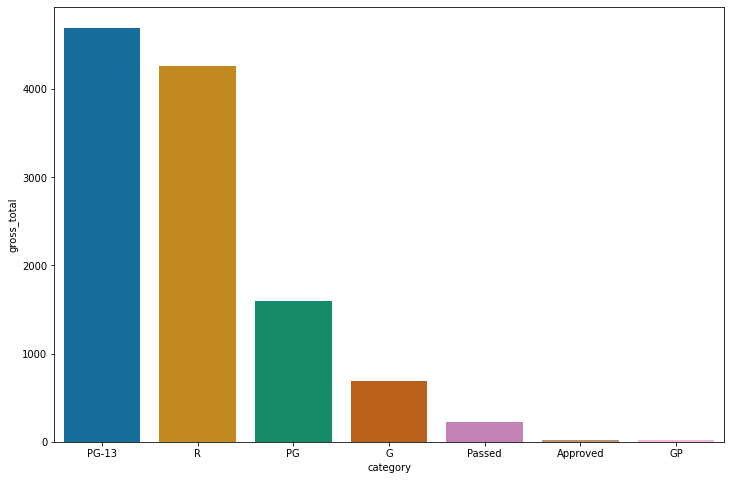

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=sum_of_category.index, y= 'gross_total', data= sum_of_category,palette = 'colorblind')


In [ ]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
97,98.0,City Lights,1931,G,87 min,"Comedy, Drama, Romance",8.5,"186,059",0.02
51,52.0,Modern Times,1936,G,87 min,"Comedy, Drama, Romance",8.5,"244,162",0.16
26,27.0,Gone with the Wind,1939,Passed,238 min,"Drama, Romance, War",8.2,"317,621",198.68
35,36.0,Citizen Kane,1941,PG,119 min,"Drama, Mystery",8.3,"444,359",1.59
5,6.0,Casablanca,1942,PG,102 min,"Drama, Romance, War",8.5,"574,092",1.02


In [ ]:
df['votes']= df['votes'].str.replace(',','').astype(int)

In [ ]:
df['votes'].max()

2683302

In [ ]:
df.iloc[3]

index                        36.0
movie_name           Citizen Kane
year_of_release              1941
category                       PG
run_time                  119 min
genre              Drama, Mystery
imdb_rating                   8.3
votes                      444359
gross_total                  1.59
Name: 35, dtype: object

In [ ]:
Year=df.groupby(by='year_of_release')['index'].count()
Year=pd.DataFrame(data= Year, columns=['index'])
Year.sort_values(by= 'index', ascending= False).head()

,index
year_of_release,
1994,5
1995,5
1999,5
2006,4
2003,4
